#                                           Coffee Shop in Toronto ?

In [436]:
import pandas as pd # library for data analysis
import numpy as np # library to handle data in a vectorized manner


### Web scraping neighbourhoods of Toronto 

In [437]:
import requests # library to handle requests
url="https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
response=requests.get(url)
print(response.status_code) 

200


In [438]:
from bs4 import BeautifulSoup # library to parse HTML documents
soup=BeautifulSoup(response.text,'html.parser')
t=soup.find('table',{'class':"wikitable"})
t1=pd.read_html(str(t))
df=pd.DataFrame(t1[0])
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [439]:
df.rename(columns={'Neighbourhood':'Neighbourhood_Name'},inplace=True)

In [440]:
index_numbers=df[df['Borough']=='Not assigned'].index
df.drop(index_numbers,inplace=True)

In [441]:
df.index=np.arange(0,len(df))
df.head()

,Postal Code,Borough,Neighbourhood_Name
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [442]:
!pip install geopy

In [443]:
import io
url="https://cocl.us/Geospatial_data"
response=requests.get(url).text
ll_data=pd.read_csv(io.StringIO(response))
ll_data.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


### Merging neighbourhoods data with location data

In [444]:
toronto_df=pd.merge(df,ll_data,on='Postal Code')
toronto_df.head(10)

,Postal Code,Borough,Neighbourhood_Name,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


In [445]:
toronto_df.shape

(103, 5)

### Web scraping population and density data 

In [446]:
url1="https://en.wikipedia.org/wiki/Demographics_of_Toronto_neighbourhoods#:~:text=Etobicoke%20%20%20%20Name%20%20%20,%20%202249%20%2011%20more%20rows"
response1=requests.get(url1)
print(response1.status_code) 

200


In [447]:
df2 = pd.read_html(url1)
len(df2)


10

In [448]:
East_York=df2[1]
East_York

,Name,FM,Census Tracts,Population,Land area (km2),Density (people/km2),% Change in Population since 2001,Average Income,Transit Commuting %,% Renters,Second most common language (after English) by name,Second most common language (after English) by percentage,Map
0,Crescent Town,EY,0190.01,8157,0.40,20393,-10.0,23021,24.5,20.3,Bengali (18.1%),18.1% Bengali,NaN
1,Governor's Bridge/Bennington Heights,EY,0186.00,2112,1.87,1129,4.0,129904,7.1,13.3,Polish (1.4%),01.4% Polish,NaN
2,Leaside,EY,"0195.00, 0196.00",13876,2.81,4938,3.0,82670,9.7,10.5,Bulgarian (0.4%),00.4% Bulgarian,NaN
3,O'Connor–Parkview,EY,"0189.00, 0190.02, 0191.00, 0192.00, 0193.00",17740,4.94,3591,-6.1,33517,15.8,19.4,Urdu (3.2%),03.2% Urdu,NaN
4,Old East York,EY,"0180.00, 0181.01, 0181.02, 0182.00, 0183.00, 0...",52220,7.94,6577,-4.6,33172,22.0,19.1,Greek (4.3%),04.3% Greek,NaN
5,Thorncliffe Park,EY,"0194.01, 0194.02, 0194.03, 0194.04",17949,3.09,5809,9.1,25340,16.7,32.5,Urdu (21.5%),21.5% Urdu,NaN


In [449]:
Etobicoke=df2[2]
Etobicoke

,Name,FM,Census Tracts,Population,Land area (km2),Density (people/km2),% Change in Population since 2001,Average Income,Transit Commuting %,% Renters,Second most common language (after English) by name,Second most common language (after English) by percentage,Map
0,Alderwood,E,"0211.00, 0212.00",11656,4.94,2360,-4.0,35239,8.8,8.5,Polish (6.2%),06.2% Polish,NaN
1,Centennial,E,"0236.01, 0236.02",12565,4.94,2544,0.5,34867,11.5,8.8,Polish (2.7%),02.7% Polish,NaN
2,Clairville,E,"0248.03, 0249.03",8506,6.71,1268,-3.3,26610,13.2,7.2,Punjabi (12.0%),12.0% Punjabi,NaN
3,Eatonville,E,"0213.00, 0221.02, 0222.01, 0222.02",19131,11.26,1699,4.3,36206,12.6,13.4,Serbian (3.2%),03.2% Serbian,NaN
4,Humber Bay Shores,E,"0200.00, 0201.00",10775,1.42,7588,-5.7,39186,15.7,31.6,Russian (5.2%),05.2% Russian,NaN
5,Humber Heights,E,"0241.00, 0242.00",4674,1.69,2766,8.3,39738,10.1,9.7,Spanish (4.1%),04.1% Spanish,NaN
6,Humberwood,E,0247.01,7319,17.40,421,8.0,29576,7.9,7.0,Punjabi (26.7%),26.7% Punjabi,NaN
7,Humber Valley Village,E,"0230.01, 0230.02. 0231.00",14453,5.45,2652,-0.1,80618,12.0,17.8,Ukrainian (3.9%),03.9% Ukrainian,NaN
8,Islington – Six Points,E,"0223.00, 0224.00, 0225.01, 0225.02",16508,4.02,4106,3.7,43570,17.1,22.2,Korean (4.9%),04.9% Korean,NaN
9,Kingsview Village,E,"0239.00, 0243.01, 0243.02",16254,4.05,4013,-6.2,32004,11.8,14.6,Somali (7.0%),07.0% Somali,NaN


In [357]:
Scarborough=df2[5]
Scarborough 

,Name,FM,Census Tracts,Population,Land area (km2),Density (people/km2),% Change in Population since 2001,Average Income,Transit Commuting %,% Renters,Second most common language (after English) by name,Second most common language (after English) by percentage,Map
0,Toronto CMA Average,NaN,All,5113149.0,5903.63,866.0,9.0,40704.0,10.6,11.4,NaN,NaN,NaN
1,Agincourt,S,"0377.01, 0377.02, 0377.03, 0377.04, 0378.02, 0...",44577.0,12.45,3580.0,4.6,25750.0,11.1,5.9,Cantonese (19.3%),19.3% Cantonese,NaN
2,Alexandra Park,OCoT,0039.00,4355.0,0.32,13609.0,0.0,19687.0,13.8,28.0,Cantonese (17.9%),17.9% Cantonese,NaN
3,Allenby,OCoT,0140.00,2513.0,0.58,4333.0,-1.0,245592.0,5.2,3.4,Russian (1.4%),01.4% Russian,NaN
4,Amesbury,NY,"0280.00, 0281.01, 0281.02",17318.0,3.51,4934.0,1.1,27546.0,16.4,19.7,Spanish (6.1%),06.1% Spanish,NaN
5,Armour Heights,NY,0298.00,4384.0,2.29,1914.0,2.0,116651.0,10.8,16.1,Russian (9.4%),09.4% Russian,NaN
6,Banbury,NY,0267.00,6641.0,2.72,2442.0,5.0,92319.0,6.1,4.8,Unspecified Chinese (5.1%),05.1% Unspecified Chinese,NaN
7,Bathurst Manor,NY,"0297.01, 0310.01, 0310.02",14945.0,4.69,3187.0,12.3,34169.0,13.4,18.6,Russian (9.5%),09.5% Russian,NaN
8,Bay Street Corridor,OCoT,0062.01,4787.0,0.11,43518.0,3.0,40598.0,17.1,49.3,Mandarin (9.6%),09.6% Mandarin,NaN
9,Bayview Village,NY,"0305.01, 305.02",12280.0,4.14,2966.0,41.6,46752.0,14.4,15.6,Cantonese (8.4%),08.4% Cantonese,NaN


In [358]:
pop_den=pd.concat([East_York,Etobicoke,Scarborough ], axis=0)

In [359]:
# Dropping rows containing OCoT (Old City of Toronto)
index_numbers_pop_den=pop_den[(pop_den['FM']=='OCoT') & (pop_den['FM'] == 'OCoT')].index 
pop_den.drop(index_numbers_pop_den,inplace=True)

In [360]:
pop_den.index=np.arange(0,len(all))
pop_den.head(2)

,Name,FM,Census Tracts,Population,Land area (km2),Density (people/km2),% Change in Population since 2001,Average Income,Transit Commuting %,% Renters,Second most common language (after English) by name,Second most common language (after English) by percentage,Map
0,Crescent Town,EY,0190.01,8157.0,0.40,20393.0,-10.0,23021.0,24.5,20.3,Bengali (18.1%),18.1% Bengali,NaN
1,Governor's Bridge/Bennington Heights,EY,0186.00,2112.0,1.87,1129.0,4.0,129904.0,7.1,13.3,Polish (1.4%),01.4% Polish,NaN


In [361]:
pop_den.rename(columns={'Name':'Neighbourhood_Name'},inplace=True)

In [362]:
neigh_pop_den=pd.merge(toronto_df,pop_den,on='Neighbourhood_Name')

In [363]:
neigh_pop_den.head(5)

,Postal Code,Borough,Neighbourhood_Name,Latitude,Longitude,FM,Census Tracts,Population,Land area (km2),Density (people/km2),% Change in Population since 2001,Average Income,Transit Commuting %,% Renters,Second most common language (after English) by name,Second most common language (after English) by percentage,Map
0,M3A,North York,Parkwoods,43.753259,-79.329656,NY,"0270.01, 0270.02, 0271.01, 0271.02, 0272.01, 0...",26533.0,4.96,5349.0,-3.7,34811.0,14.0,22.5,Unspecified Chinese (3.4%),03.4% Unspecified Chinese,NaN
1,M4A,North York,Victoria Village,43.725882,-79.315572,NY,"0261.00, 0262.01, 0262.02",17047.0,4.72,3612.0,2.5,29657.0,15.6,23.4,Urdu (3.2%),03.2% Urdu,NaN
2,M3B,North York,Don Mills,43.745906,-79.352188,NY,"0263.02, 0263.03, 0263.04, 0268.00, 0269.02",21372.0,8.99,2377.0,11.9,47515.0,10.8,18.6,Unspecified Chinese (3.9%),03.9% Unspecified Chinese,NaN
3,M3C,North York,Don Mills,43.725900,-79.340923,NY,"0263.02, 0263.03, 0263.04, 0268.00, 0269.02",21372.0,8.99,2377.0,11.9,47515.0,10.8,18.6,Unspecified Chinese (3.9%),03.9% Unspecified Chinese,NaN
4,M1G,Scarborough,Woburn,43.770992,-79.216917,S,"0356.00, 0357.01, 0357.02, 0363.07, 0364.01, 0...",48507.0,13.34,3636.0,-1.5,26190.0,13.3,16.0,Gujarati (9.1%),09.1% Gujarati,NaN


In [489]:
neigh_pop_den.shape

(16, 10)

In [486]:
#neigh_pop_den.iloc[:,8].values

In [487]:
#neigh_pop_den.drop(neigh_pop_den.iloc[:,8] , axis=1, inplace=True)

In [364]:
neigh_pop_den.columns

Index(['Postal Code', 'Borough', 'Neighbourhood_Name', 'Latitude', 'Longitude',
       'FM', 'Census Tracts', 'Population', 'Land area (km2)',
       'Density (people/km2)', '% Change in Population since 2001',
       'Average Income', 'Transit Commuting %', '% Renters',
       'Second most common language (after English) by name',
       'Second most common language (after English) by percentage', 'Map'],
      dtype='object')

In [365]:
#Dropping all the unrequired columns
neigh_pop_den.drop(['FM','Census Tracts','Land area (km2)','% Change in Population since 2001','% Renters','Second most common language (after English) by percentage','Map'], axis = 1,inplace=True) 

In [366]:
neigh_pop_den.columns

Index(['Postal Code', 'Borough', 'Neighbourhood_Name', 'Latitude', 'Longitude',
       'Population', 'Density (people/km2)', 'Average Income',
       'Transit Commuting %',
       'Second most common language (after English) by name'],
      dtype='object')

In [367]:
neigh_pop_density=pd.DataFrame()
neigh_pop_density['Postal Code']=neigh_pop_den['Postal Code']
neigh_pop_density['Borough']=neigh_pop_den['Borough']
neigh_pop_density['Neighbourhood_Name']=neigh_pop_den['Neighbourhood_Name']
neigh_pop_density['Latitude']=neigh_pop_den['Latitude']
neigh_pop_density['Longitude']=neigh_pop_den['Longitude']
neigh_pop_density['Population']=neigh_pop_den['Population']
neigh_pop_density['Density (people/km2)']=neigh_pop_den['Density (people/km2)']
neigh_pop_density['Average Income']=neigh_pop_den['Average Income']
neigh_pop_density['Second most common language (after English) by name']=neigh_pop_den['Second most common language (after English) by name']

In [368]:
neigh_pop_density

,Postal Code,Borough,Neighbourhood_Name,Latitude,Longitude,Population,Density (people/km2),Average Income,Second most common language (after English) by name
0,M3A,North York,Parkwoods,43.753259,-79.329656,26533.0,5349.0,34811.0,Unspecified Chinese (3.4%)
1,M4A,North York,Victoria Village,43.725882,-79.315572,17047.0,3612.0,29657.0,Urdu (3.2%)
2,M3B,North York,Don Mills,43.745906,-79.352188,21372.0,2377.0,47515.0,Unspecified Chinese (3.9%)
3,M3C,North York,Don Mills,43.725900,-79.340923,21372.0,2377.0,47515.0,Unspecified Chinese (3.9%)
4,M1G,Scarborough,Woburn,43.770992,-79.216917,48507.0,3636.0,26190.0,Gujarati (9.1%)
5,M4H,East York,Thorncliffe Park,43.705369,-79.349372,17949.0,5809.0,25340.0,Urdu (21.5%)
6,M1J,Scarborough,Scarborough Village,43.744734,-79.239476,12796.0,6303.0,24413.0,Tamil (11.4%)
7,M2K,North York,Bayview Village,43.786947,-79.385975,12280.0,2966.0,46752.0,Cantonese (8.4%)
8,M3K,North York,Downsview,43.737473,-79.464763,36613.0,2270.0,26751.0,Italian (11.7%)
9,M3L,North York,Downsview,43.739015,-79.506944,36613.0,2270.0,26751.0,Italian (11.7%)


### Exploring venues in the neighbourhoods of Toronto using FourSquare

In [369]:
CLIENT_ID = 'JFZUHYI3MAVIPKFIFCSJBB0JQ3LARPTTAPAOLBXGH31E5XMZ' # your Foursquare ID
CLIENT_SECRET = 'BZ50FBWOBIOGYNOXBQNFRRL2MZ2JNIGRM42UM3FEM5RNDMP3' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
RADIUS = 1000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JFZUHYI3MAVIPKFIFCSJBB0JQ3LARPTTAPAOLBXGH31E5XMZ
CLIENT_SECRET:BZ50FBWOBIOGYNOXBQNFRRL2MZ2JNIGRM42UM3FEM5RNDMP3


In [381]:
def neigh_explore(borough_data):
    print('The below dataframe contains venues of the Neighbourhoods in Toronto')
    venues_list=[]
    for i in range(0,len(borough_data)):
        borough_neigh = borough_data.loc[i,'Neighbourhood_Name']
        n = (borough_data['Neighbourhood_Name'] == borough_neigh)
        borough_neigh_lat = borough_data.loc[n,'Latitude'].values
        borough_neigh_long = borough_data.loc[n,'Longitude'].values
        #print('The latitude & longitude of {} are : {} & {}'.format(borough_neigh_pop_density,borough_neigh_pop_density_lat[0],borough_neigh_pop_density_long[0]))
        url = 'https://api.foursquare.com/v2/venues/explore?/&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET,
                                                                                                            VERSION,borough_neigh_lat[0],borough_neigh_long[0],RADIUS,LIMIT)
        result=requests.get(url).json()['response']['groups'][0]['items']        
        venues_list.append([(borough_neigh,borough_neigh_lat[0],borough_neigh_long[0],
                            v['venue']['name'],
                            v['venue']['categories'][0]['name'],
                            v['venue']['location']['lat'],
                            v['venue']['location']['lng']) for v in result])
 #   for venue in venues_list:
  #      for item in venue:
   #         nearby_venues = pd.DataFrame(item)
    nearby_venues = pd.DataFrame([item for venue in venues_list for item in venue])
    nearby_venues.columns = ['Neighbourhood_Name','Neighbourhood_Lat','Neighbourhood_Lng','Venue_Name','Venue_Category','Venue_Lat','Venue_Lng']
    return(nearby_venues)

In [385]:
neigh_venues=neigh_explore(toronto_df)
neigh_venues.head(5)

The below dataframe contains venues of the Neighbourhoods in Toronto


,Neighbourhood_Name,Neighbourhood_Lat,Neighbourhood_Lng,Venue_Name,Venue_Category,Venue_Lat,Venue_Lng
0,Parkwoods,43.753259,-79.329656,Allwyn's Bakery,Caribbean Restaurant,43.759840,-79.324719
1,Parkwoods,43.753259,-79.329656,Brookbanks Park,Park,43.751976,-79.332140
2,Parkwoods,43.753259,-79.329656,Tim Hortons,Café,43.760668,-79.326368
3,Parkwoods,43.753259,-79.329656,Bruno's valu-mart,Grocery Store,43.746143,-79.324630
4,Parkwoods,43.753259,-79.329656,A&W,Fast Food Restaurant,43.760643,-79.326865


In [488]:
neigh_venues.shape

(4893, 7)

In [386]:
# One Hot Encoding the venue categories
neigh_venues_onehot = pd.get_dummies(neigh_venues[['Venue_Category']],prefix="",prefix_sep="")
neigh_venues_onehot['Neighbourhood_Name'] = neigh_venues['Neighbourhood_Name']
columns = [neigh_venues_onehot.columns[-1]] + list(neigh_venues_onehot.columns[:-1])
neigh_venues_onehot = neigh_venues_onehot[columns]
neigh_venues_onehot.head(5)

,Neighbourhood_Name,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Quad,College Rec Center,College Stadium,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fireworks Store,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Laundry Service,Light Rail Station,Lighting Store,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoors & Recreation,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Photography Studio,Pide Place,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Ski Area,Ski Chalet,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South American Restaurant,Souvlaki Shop,Spa,Speakeas

In [388]:
# Grouping neighbourhoods
neigh_venues_group = neigh_venues_onehot.groupby('Neighbourhood_Name').sum().reset_index()
neigh_venues_group.head(5)

,Neighbourhood_Name,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Quad,College Rec Center,College Stadium,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fireworks Store,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Laundry Service,Light Rail Station,Lighting Store,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoors & Recreation,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Photography Studio,Pide Place,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Ski Area,Ski Chalet,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South American Restaurant,Souvlaki Shop,Spa,Speakeas

In [389]:
merged=pd.merge(neigh_pop_density,neigh_venues_group,on='Neighbourhood_Name')
merged.head(1)

,Postal Code,Borough,Neighbourhood_Name,Latitude,Longitude,Population,Density (people/km2),Average Income,Second most common language (after English) by name,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Quad,College Rec Center,College Stadium,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fireworks Store,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Laundry Service,Light Rail Station,Lighting Store,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoors & Recreation,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Photography Studio,Pide Place,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Ski Area,S

In [492]:
# DataFrame of required columns for analysis
neigh_pop_den_venues=pd.DataFrame()
neigh_pop_den_venues['Postal Code']=merged['Postal Code']
neigh_pop_den_venues['Borough']=merged['Borough']
neigh_pop_den_venues['Neighbourhood_Name']=merged['Neighbourhood_Name']
neigh_pop_den_venues['Latitude']=merged['Latitude']
neigh_pop_den_venues['Longitude']=merged['Longitude']
neigh_pop_den_venues['Population']=merged['Population']
neigh_pop_den_venues['Density (people/km2)']=merged['Density (people/km2)']
neigh_pop_den_venues['Café']=merged['Café']
neigh_pop_den_venues['Coffee Shop']=merged['Coffee Shop']
neigh_pop_den_venues.head()

,Postal Code,Borough,Neighbourhood_Name,Latitude,Longitude,Population,Density (people/km2),Café,Coffee Shop
0,M3A,North York,Parkwoods,43.753259,-79.329656,26533.0,5349.0,1,1
1,M4A,North York,Victoria Village,43.725882,-79.315572,17047.0,3612.0,0,2
2,M3B,North York,Don Mills,43.745906,-79.352188,21372.0,2377.0,2,6
3,M3C,North York,Don Mills,43.725900,-79.340923,21372.0,2377.0,2,6
4,M1G,Scarborough,Woburn,43.770992,-79.216917,48507.0,3636.0,0,2


In [493]:
# Adding values of Cafe and Coffe Shop (as both are same)
neigh_pop_den_venues['Coffee Shop']=neigh_pop_den_venues['Café']+neigh_pop_den_venues['Coffee Shop']

In [494]:
neigh_pop_den_venues.head(3)

,Postal Code,Borough,Neighbourhood_Name,Latitude,Longitude,Population,Density (people/km2),Café,Coffee Shop
0,M3A,North York,Parkwoods,43.753259,-79.329656,26533.0,5349.0,1,2
1,M4A,North York,Victoria Village,43.725882,-79.315572,17047.0,3612.0,0,2
2,M3B,North York,Don Mills,43.745906,-79.352188,21372.0,2377.0,2,8


In [496]:
neigh_pop_den_venues.shape

(16, 9)

In [497]:
neigh_pop_den_venues.drop(['Café'],inplace=True,axis=1)

In [498]:
neigh_pop_den_venues.head(3)

,Postal Code,Borough,Neighbourhood_Name,Latitude,Longitude,Population,Density (people/km2),Coffee Shop
0,M3A,North York,Parkwoods,43.753259,-79.329656,26533.0,5349.0,2
1,M4A,North York,Victoria Village,43.725882,-79.315572,17047.0,3612.0,2
2,M3B,North York,Don Mills,43.745906,-79.352188,21372.0,2377.0,8


In [502]:
# Normalisation
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()
neigh_pop_den_venues['Population']=scaling.fit_transform(neigh_pop_den_venues[['Population']])
neigh_pop_den_venues['Density (people/km2)']=scaling.fit_transform(neigh_pop_den_venues[['Density (people/km2)']])
neigh_pop_den_venues['Coffee Shop']=scaling.fit_transform(neigh_pop_den_venues[['Coffee Shop']])

In [503]:
neigh_pop_den_venues.head(2)

,Postal Code,Borough,Neighbourhood_Name,Latitude,Longitude,Population,Density (people/km2),Coffee Shop
0,M3A,North York,Parkwoods,43.753259,-79.329656,0.484783,0.754347,0.125
1,M4A,North York,Victoria Village,43.725882,-79.315572,0.262368,0.403154,0.125


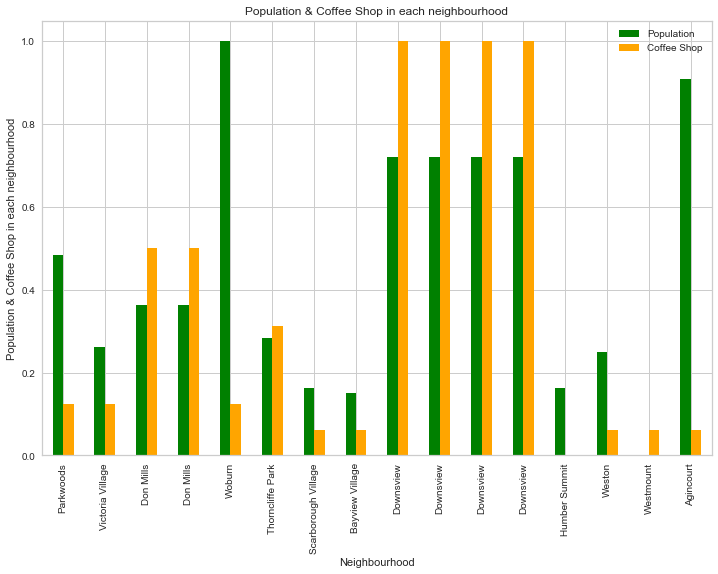

In [527]:
neigh_pop_den_venues.plot(kind='bar',x='Neighbourhood_Name', y=['Population','Coffee Shop'],figsize=(12,8), color=['Green','Orange'])
plt.title("Population & Coffee Shop in each neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("Population & Coffee Shop in each neighbourhood")
plt.show()

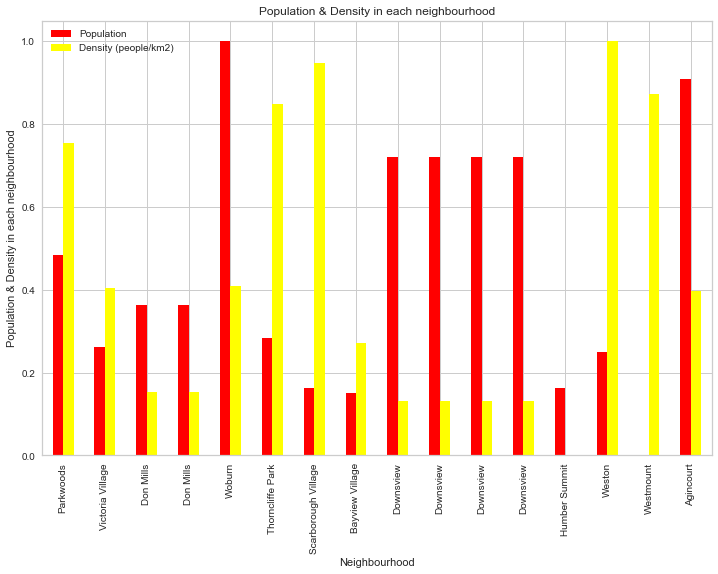

In [526]:
neigh_pop_den_venues.plot(kind='bar',x='Neighbourhood_Name', y=['Population','Density (people/km2)'],figsize=(12,8), color=['Red','Yellow'])
plt.title("Population & Density in each neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("Population & Density in each neighbourhood")
plt.show()

In [397]:
# DataFrame for clustering neighbourhoods based on Coffee Shops
clusters=pd.DataFrame()
clusters['Coffee Shop']=neigh_pop_den_venues['Coffee Shop']
clusters

,Coffee Shop
0,0.1250
1,0.1250
2,0.5000
3,0.5000
4,0.1250
5,0.3125
6,0.0625
7,0.0625
8,1.0000
9,1.0000


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  import sys


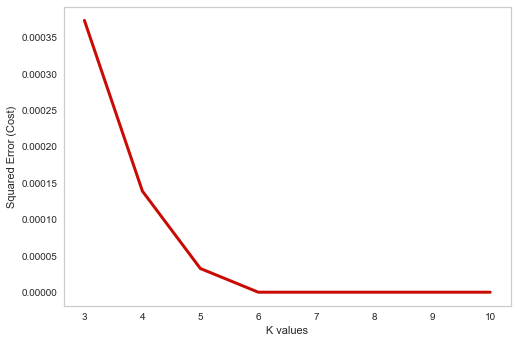

In [398]:
from sklearn.cluster import KMeans
error_cost = []

for i in range(3,11):
    KM = KMeans(n_clusters = i, max_iter = 100)
    try:
        KM.fit(clusters)
    except ValueError:
        print("error on line",i)
    
    
    
    
    #calculate squared error for the clustered points
    error_cost.append(KM.inertia_/100)

#plot the K values aganist the squared error cost
plt.plot(range(3,11), error_cost, color='r', linewidth='3')
plt.xlabel('K values')
plt.ylabel('Squared Error (Cost)')
plt.grid(color='white', linestyle='-', linewidth=2)
plt.show()

In [399]:
!pip install yellowbrick

In [400]:
from yellowbrick.cluster import KElbowVisualizer

C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:312: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  self.estimator.fit(X, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:312: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  self.estimator.fit(X, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:312: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  self.estimator.fit(X, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:312: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  self.estimator.fit(X, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\yellowbr

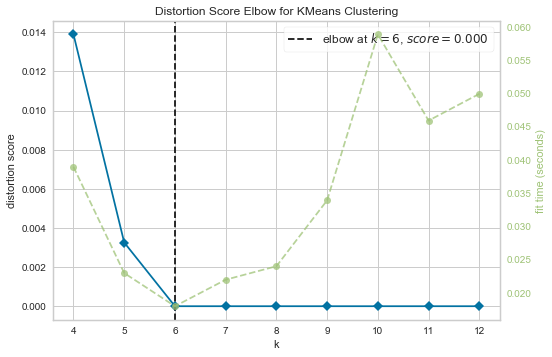

In [401]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,13))

visualizer.fit(clusters)        # Fit the data to the visualizer
visualizer.show()

In [402]:
kclusters = 6

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(clusters)

kmeans.labels_

array([3, 3, 2, 2, 3, 4, 5, 5, 1, 1, 1, 1, 0, 5, 5, 5])

In [414]:
neigh_pop_den_venues.drop(['Cluster_Labels'],axis=1,inplace=True)

In [415]:
#sorted_neigh_pop_densityborhoods_venues.drop(['Cluster Labels'],axis=1,inplace=True)
neigh_pop_den_venues.insert(8, 'Cluster_Labels', kmeans.labels_)
neigh_pop_den_venues

,Postal Code,Borough,Neighbourhood_Name,Latitude,Longitude,Population,Density (people/km2),Coffee Shop,Cluster_Labels
0,M3A,North York,Parkwoods,43.753259,-79.329656,0.484783,0.754347,0.1250,3
1,M4A,North York,Victoria Village,43.725882,-79.315572,0.262368,0.403154,0.1250,3
2,M3B,North York,Don Mills,43.745906,-79.352188,0.363775,0.153457,0.5000,2
3,M3C,North York,Don Mills,43.725900,-79.340923,0.363775,0.153457,0.5000,2
4,M1G,Scarborough,Woburn,43.770992,-79.216917,1.000000,0.408006,0.1250,3
5,M4H,East York,Thorncliffe Park,43.705369,-79.349372,0.283517,0.847351,0.3125,4
6,M1J,Scarborough,Scarborough Village,43.744734,-79.239476,0.162696,0.947230,0.0625,5
7,M2K,North York,Bayview Village,43.786947,-79.385975,0.150598,0.272543,0.0625,5
8,M3K,North York,Downsview,43.737473,-79.464763,0.721125,0.131824,1.0000,1
9,M3L,North York,Downsview,43.739015,-79.506944,0.721125,0.131824,1.0000,1


In [416]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
address='Toronto'
geolocator=Nominatim(user_agent='t_explorer')
location=geolocator.geocode(address)
latitude=location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [417]:
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
    # set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

    # add markers to the map
markers_colors = []
for lat, lon, poi, pc, cluster in zip(req['Latitude'], req['Longitude'], req['Neighbourhood_Name'], req['Postal Code'], req['Cluster_Labels']):
    label = folium.Popup(str(pc) + " " + str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
          [lat, lon],
          radius=5,
          popup=label,
          color=rainbow[cluster-1],
          fill=True,
          fill_color=rainbow[cluster-1],
          fill_opacity=0.7).add_to(map_clusters)
map_clusters

In [418]:
cluster1=neigh_pop_den_venues.loc[neigh_pop_den_venues['Cluster_Labels'] == 0, neigh_pop_den_venues.columns[[0] + [2] + list(range(5, neigh_pop_den_venues.shape[1]))]]
cluster1

,Postal Code,Neighbourhood_Name,Population,Density (people/km2),Coffee Shop,Cluster_Labels
12,M9L,Humber Summit,0.161993,0.0,0.0,0


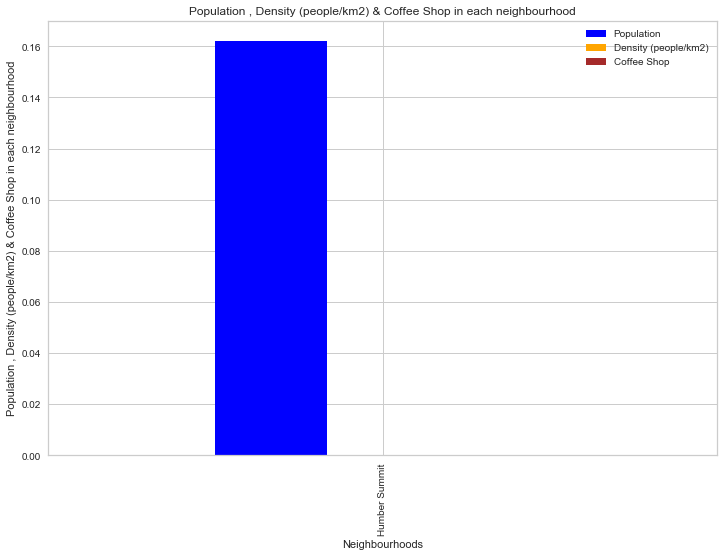

In [422]:
cluster1.plot(kind='bar',x='Neighbourhood_Name', y=['Population','Density (people/km2)','Coffee Shop'],figsize=(12,8), color=['Blue','Orange','brown'])
plt.title("Population , Density (people/km2) & Coffee Shop in each neighbourhood")
plt.xlabel("Neighbourhoods")
plt.ylabel("Population , Density (people/km2) & Coffee Shop in each neighbourhood")
plt.show()

In [424]:
cluster2=neigh_pop_den_venues.loc[neigh_pop_den_venues['Cluster_Labels'] == 1, neigh_pop_den_venues.columns[[0] + [2] + list(range(5, neigh_pop_den_venues.shape[1]))]]
cluster2

,Postal Code,Neighbourhood_Name,Population,Density (people/km2),Coffee Shop,Cluster_Labels
8,M3K,Downsview,0.721125,0.131824,1.0,1
9,M3L,Downsview,0.721125,0.131824,1.0,1
10,M3M,Downsview,0.721125,0.131824,1.0,1
11,M3N,Downsview,0.721125,0.131824,1.0,1


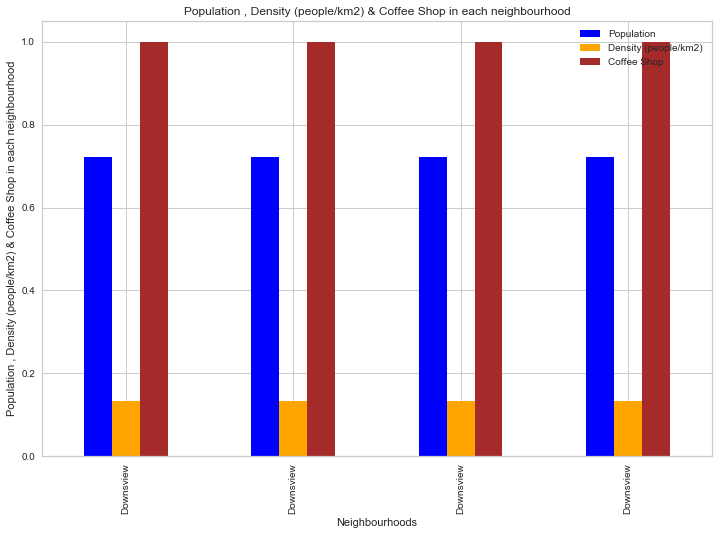

In [506]:
cluster2.plot(kind='bar',x='Neighbourhood_Name', y=['Population','Density (people/km2)','Coffee Shop'],figsize=(12,8), color=['Blue','Orange','brown'])
plt.title("Population , Density (people/km2) & Coffee Shop in each neighbourhood")
plt.xlabel("Neighbourhoods")
plt.ylabel("Population , Density (people/km2) & Coffee Shop in each neighbourhood")
plt.show()

In [428]:
cluster3=neigh_pop_den_venues.loc[neigh_pop_den_venues['Cluster_Labels'] == 2, neigh_pop_den_venues.columns[[0] + [2] + list(range(5, neigh_pop_den_venues.shape[1]))]]
cluster3

,Postal Code,Neighbourhood_Name,Population,Density (people/km2),Coffee Shop,Cluster_Labels
2,M3B,Don Mills,0.363775,0.153457,0.5,2
3,M3C,Don Mills,0.363775,0.153457,0.5,2


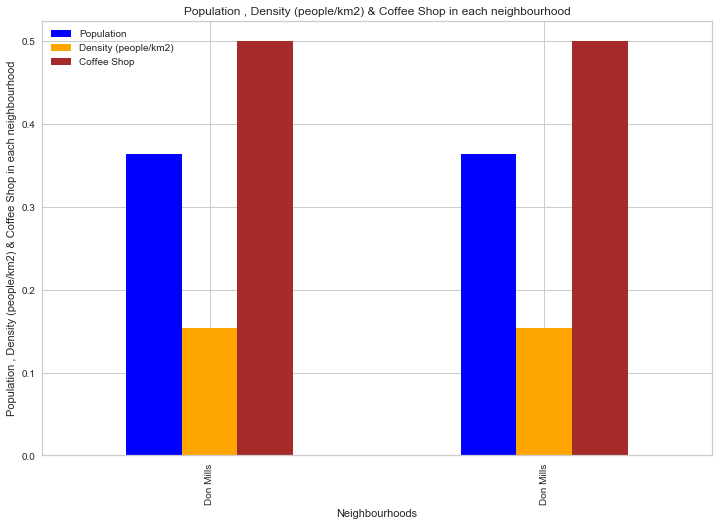

In [507]:
cluster3.plot(kind='bar',x='Neighbourhood_Name', y=['Population','Density (people/km2)','Coffee Shop'],figsize=(12,8), color=['Blue','Orange','brown'])
plt.title("Population , Density (people/km2) & Coffee Shop in each neighbourhood")
plt.xlabel("Neighbourhoods")
plt.ylabel("Population , Density (people/km2) & Coffee Shop in each neighbourhood")
plt.show()

In [431]:
cluster4=neigh_pop_den_venues.loc[neigh_pop_den_venues['Cluster_Labels'] == 3, neigh_pop_den_venues.columns[[0] + [2] + list(range(5, neigh_pop_den_venues.shape[1]))]]
cluster4

,Postal Code,Neighbourhood_Name,Population,Density (people/km2),Coffee Shop,Cluster_Labels
0,M3A,Parkwoods,0.484783,0.754347,0.125,3
1,M4A,Victoria Village,0.262368,0.403154,0.125,3
4,M1G,Woburn,1.000000,0.408006,0.125,3


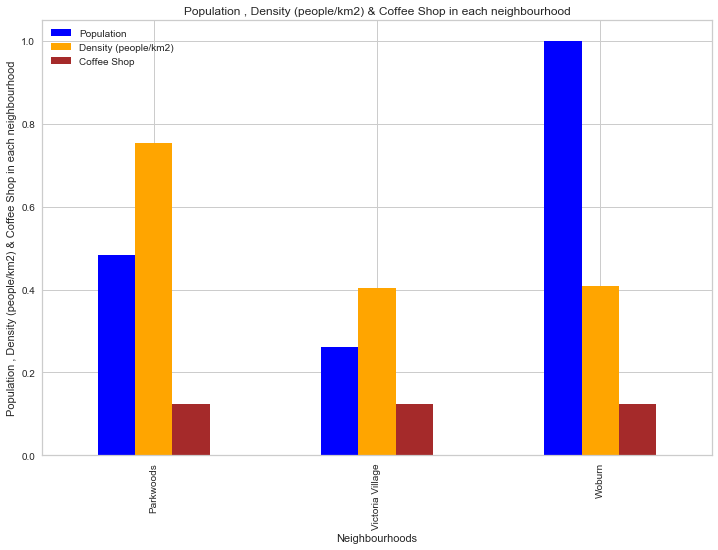

In [508]:
cluster4.plot(kind='bar',x='Neighbourhood_Name', y=['Population','Density (people/km2)','Coffee Shop'],figsize=(12,8), color=['Blue','Orange','brown'])
plt.title("Population , Density (people/km2) & Coffee Shop in each neighbourhood")
plt.xlabel("Neighbourhoods")
plt.ylabel("Population , Density (people/km2) & Coffee Shop in each neighbourhood")
plt.show()

In [430]:
cluster5=neigh_pop_den_venues.loc[neigh_pop_den_venues['Cluster_Labels'] == 4, neigh_pop_den_venues.columns[[0] + [2] + list(range(5, neigh_pop_den_venues.shape[1]))]]
cluster5

,Postal Code,Neighbourhood_Name,Population,Density (people/km2),Coffee Shop,Cluster_Labels
5,M4H,Thorncliffe Park,0.283517,0.847351,0.3125,4


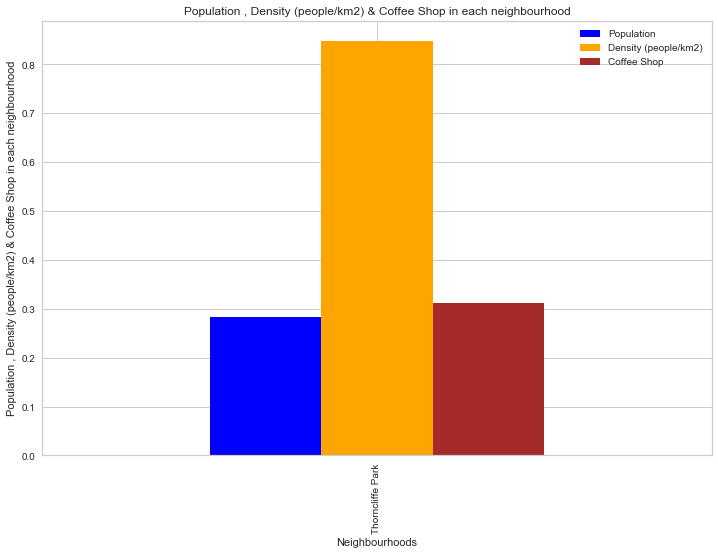

In [509]:
cluster5.plot(kind='bar',x='Neighbourhood_Name', y=['Population','Density (people/km2)','Coffee Shop'],figsize=(12,8), color=['Blue','Orange','brown'])
plt.title("Population , Density (people/km2) & Coffee Shop in each neighbourhood")
plt.xlabel("Neighbourhoods")
plt.ylabel("Population , Density (people/km2) & Coffee Shop in each neighbourhood")
plt.show()

In [434]:
cluster6=neigh_pop_den_venues.loc[neigh_pop_den_venues['Cluster_Labels'] == 5, neigh_pop_den_venues.columns[[0] + [2] + list(range(5, neigh_pop_den_venues.shape[1]))]]
cluster6

,Postal Code,Neighbourhood_Name,Population,Density (people/km2),Coffee Shop,Cluster_Labels
6,M1J,Scarborough Village,0.162696,0.947230,0.0625,5
7,M2K,Bayview Village,0.150598,0.272543,0.0625,5
13,M9N,Weston,0.248980,1.000000,0.0625,5
14,M9P,Westmount,0.000000,0.872220,0.0625,5
15,M1S,Agincourt,0.907855,0.396684,0.0625,5


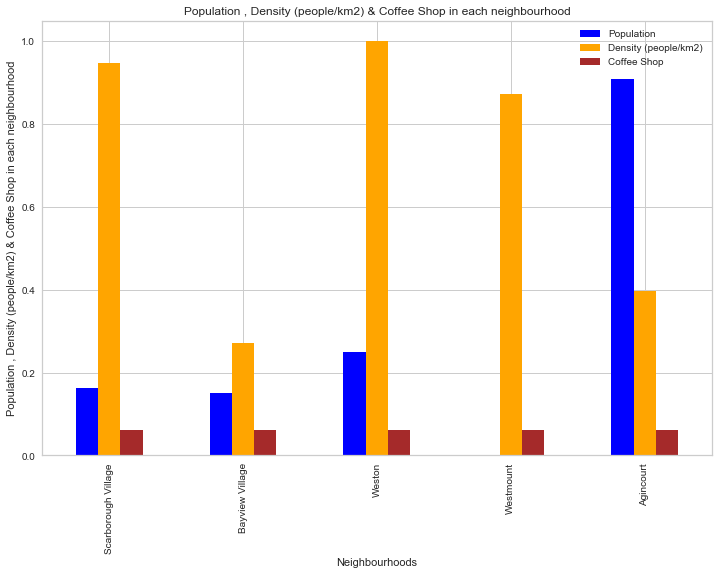

In [510]:
cluster6.plot(kind='bar',x='Neighbourhood_Name', y=['Population','Density (people/km2)','Coffee Shop'],figsize=(12,8), color=['Blue','Orange','brown'])
plt.title("Population , Density (people/km2) & Coffee Shop in each neighbourhood")
plt.xlabel("Neighbourhoods")
plt.ylabel("Population , Density (people/km2) & Coffee Shop in each neighbourhood")
plt.show()